<a href="https://colab.research.google.com/github/VulcanLogicWeaver/UsedCars/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
##Upload vehicles.csv file from data folder

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

vehicles = pd.read_csv('/bin/data/vehicles.csv')
##vehicles.head()
#print(vehicles.isnull().sum())

#Create a new dataframe used_cars with the following columns [ID, Price, Year, Manufacturer, Odometer, Title Status, Condition, Transmission]
used_cars = vehicles[['id', 'price', 'year', 'manufacturer', 'odometer', 'title_status', 'condition', 'transmission']]
print('\nFollowing columns have null values')
print(used_cars.isnull().sum())
print('Total rows in Vehicles dataset:', len(used_cars))
used_cars = used_cars.dropna()
print('Total rows in Used cars dataset:', len(used_cars))


Following columns have null values
id                   0
price                0
year              1205
manufacturer     17646
odometer          4400
title_status      8242
condition       174104
transmission      2556
dtype: int64
Total rows in Vehicles dataset: 426880
Total rows in Used cars dataset: 234588


In [24]:
expensive_used_cars = vehicles[['id', 'price', 'year', 'manufacturer', 'odometer', 'title_status', 'condition', 'transmission']]
expensive_used_cars = expensive_used_cars.dropna()

#expensive_used_cars['year'] = expensive_used_cars['year'].astype(int)
#expensive_used_cars['odometer'] = expensive_used_cars['odometer'].astype(int)
expensive_used_cars = expensive_used_cars[(expensive_used_cars['price'] > 100000) & (expensive_used_cars['price'] <= 1000000)]
#expensive_used_cars = expensive_used_cars[expensive_used_cars['year'] >= 1990]
expensive_used_cars = expensive_used_cars.sort_values(by='price', ascending=False)
#print(expensive_used_cars.head())
print(expensive_used_cars.describe())
print('Unique models:', expensive_used_cars['manufacturer'].nunique())
print('Total rows of expensive used cars:', len(expensive_used_cars))

## Since there as so few cars whos price is greater than $100,000; these can be ignored for analysis pruposes

                 id          price         year       odometer
count  1.770000e+02     177.000000   177.000000     177.000000
mean   7.311620e+09  135794.406780  2008.310734   33470.282486
std    4.746291e+06   54139.444088    19.163458   53926.432933
min    7.301595e+09  102900.000000  1933.000000       0.000000
25%    7.308289e+09  110000.000000  2006.000000     700.000000
50%    7.313576e+09  123456.000000  2017.000000    9964.000000
75%    7.315754e+09  135000.000000  2020.000000   43000.000000
max    7.317038e+09  655000.000000  2021.000000  270000.000000
Unique models: 26
Total rows of expensive used cars: 177


In [25]:
## Data cleanup
# Filter the used_cars dataframe based on following creteriato
# Cars with Odometer below 500,000 + prices between $1,000 & $100,000 + cars after year 1990
used_cars['year'] = used_cars['year'].astype(int)
used_cars['odometer'] = used_cars['odometer'].astype(int)
used_cars = used_cars[(used_cars['odometer'] <= 500000)]
used_cars = used_cars[(used_cars['price'] > 1000) & (used_cars['price'] <= 100000)]
used_cars = used_cars[used_cars['year'] >= 1990]
#used_cars_sorted = used_cars.sort_values(by='price', ascending=False)
print('Unique models:', used_cars['manufacturer'].nunique())
#print(used_cars_sorted.head())
used_cars = used_cars.set_index('id')
print(used_cars.describe())
print('Total rows in Used cars dataset after cleanup:', len(used_cars))

Unique models: 41
               price           year       odometer
count  213561.000000  213561.000000  213561.000000
mean    18648.573724    2012.126123   90938.681108
std     13107.248611       6.017400   65256.275792
min      1004.000000    1990.000000       0.000000
25%      7500.000000    2008.000000   33242.000000
50%     15990.000000    2013.000000   84000.000000
75%     27990.000000    2017.000000  136000.000000
max    100000.000000    2022.000000  500000.000000
Total rows in Used cars dataset after cleanup: 213561


In [26]:
## Using values in condition column to identify how it influences the price of the car
# Use one hot encoding for 'condition' column
used_cars_condition = used_cars[['price', 'condition']]

# Apply one-hot encoding to the 'condition' column to create dummy columns
used_cars_condition = pd.get_dummies(used_cars_condition, columns=['condition'], prefix='condition')
condition_correlation_matrix = used_cars_condition.corr()
condition_corr = condition_correlation_matrix['price'].filter(like='condition_')

# Print the correlations
print("\nCorrelation of 'condition' columns with 'price':")
condition_corr.sort_values(ascending=False)

condition_counts = used_cars['condition'].value_counts().reset_index()
condition_counts.columns = ['condition', 'num_vehicles_sold']

avg_price_by_condition = used_cars.groupby('condition')['price'].mean().reset_index()
avg_price_by_condition.columns = ['condition', 'average_price']

condition_summary = pd.merge(condition_counts, avg_price_by_condition, on='condition')
print("\nNumber of vehicles sold and average price by condition:")
condition_summary

## Observation 1
## This basically confirms condition column with values New, Like New and Good condition has positive impact on price (as expected)


Correlation of 'condition' columns with 'price':

Number of vehicles sold and average price by condition:


,condition,num_vehicles_sold,average_price
0,good,109637,21541.011082
1,excellent,80383,15308.625207
2,like new,17968,19286.239648
3,fair,4401,4014.028175
4,new,852,28666.683099
5,salvage,320,5431.546875


In [27]:
## Using values in condition column to identify how it influences the price of the car
# Use one hot encoding for 'title_status' column

used_cars_title_status = used_cars[['price', 'title_status']]

# Apply one-hot encoding to the 'title_status'  column to create dummy columns
used_cars_title_status = pd.get_dummies(used_cars_title_status, columns=['title_status'], prefix='title_status')
title_status_correlation_matrix = used_cars_title_status.corr()
title_status_corr = title_status_correlation_matrix['price'].filter(like='title_status_')

# Print the correlations
print("\nCorrelation of dummy 'Title Status' columns with 'price':")
print(title_status_corr.sort_values(ascending=False))

title_status_counts = used_cars['title_status'].value_counts().reset_index()
title_status_counts.columns = ['title_status', 'num_vehicles_sold']

avg_price_by_title_status = used_cars.groupby('title_status')['price'].mean().reset_index()
avg_price_by_title_status.columns = ['title_status', 'average_price']

title_status_summary = pd.merge(title_status_counts, avg_price_by_title_status, on='title_status')
print("\nNumber of vehicles sold and average price by title status:")
title_status_summary

## Observation 2
## This basically confirms title_status column with values Salvage, Rebuilt, Missing, Parts only condition has negative impact on price (as expected)
## Also the number of cars sold with clean title is highest


Correlation of dummy 'Title Status' columns with 'price':
title_status_clean         0.083205
title_status_lien          0.021111
title_status_parts only   -0.013756
title_status_missing      -0.026578
title_status_rebuilt      -0.066178
title_status_salvage      -0.070013
Name: price, dtype: float64

Number of vehicles sold and average price by title status:


,title_status,num_vehicles_sold,average_price
0,clean,205057,18870.665815
1,rebuilt,4879,12975.763681
2,salvage,2253,9761.306258
3,lien,1213,22309.683430
4,missing,118,3832.330508
5,parts only,41,5636.536585


In [28]:
## Using values in condition column to identify how it influences the price of the car
# Use one hot encoding for 'transmission' column

used_cars_transmission = used_cars[['price', 'transmission']]

# Apply one-hot encoding to the 'transmission' column
used_cars_transmission = pd.get_dummies(used_cars_transmission, columns=['transmission'], prefix='transmission')
transmission_correlation_matrix = used_cars_transmission.corr()
transmission_corr = transmission_correlation_matrix['price'].filter(like='transmission_')

# Print the correlations
print("\nCorrelation of dummy 'Transmission' columns with 'price':")
transmission_corr.sort_values(ascending=False)

transmission_counts = used_cars['transmission'].value_counts().reset_index()
transmission_counts.columns = ['transmission', 'num_vehicles_sold']

avg_price_by_transmission = used_cars.groupby('transmission')['price'].mean().reset_index()
avg_price_by_transmission.columns = ['transmission', 'average_price']

transmission_summary = pd.merge(transmission_counts, avg_price_by_transmission, on='transmission')
print("\nNumber of vehicles sold and average price by transmission:")
transmission_summary

## Observation 3
## This basically confirms 'transmission' other seems to have a positive impact on price (was expecting automatic to have a positive impact, but does not seem to be the case)


Correlation of dummy 'Transmission' columns with 'price':

Number of vehicles sold and average price by transmission:


,transmission,num_vehicles_sold,average_price
0,automatic,147507,15087.474405
1,other,55461,29200.022917
2,manual,10593,12993.249788


In [29]:
# Create odometer in groups of 25000 and generate the average price column for the top 15 groups

import pandas as pd
used_cars['odometer_group_25000'] = pd.cut(used_cars['odometer'], bins=range(0, used_cars['odometer'].max() + 25000, 25000), right=False, labels=[f'{i}-{i+24999}' for i in range(0, used_cars['odometer'].max() + 25000, 25000)][:-1])

odometer_group_25000_summary = used_cars.groupby('odometer_group_25000')['price'].agg(['count', 'mean']).reset_index()
odometer_group_25000_summary.columns = ['odometer_group', 'num_vehicles', 'average_price']

# Sort by the number of vehicles in descending order and take the top 15
top_15_odometer_groups = odometer_group_25000_summary.sort_values(by='num_vehicles', ascending=False).head(15)

print("\nNumber of vehicles and average price by odometer group (25000 increments) for top 15 groups by count:")
top_15_odometer_groups.sort_values(by='average_price', ascending=False)


Number of vehicles and average price by odometer group (25000 increments) for top 15 groups by count:


,odometer_group,num_vehicles,average_price
0,0-24999,40211,31035.212355
1,25000-49999,33747,27306.070880
2,50000-74999,23490,21521.236441
3,75000-99999,25953,15885.753285
4,100000-124999,26083,12442.133689
5,125000-149999,23021,10482.761956
6,150000-174999,17159,8951.736931
14,350000-374999,111,8113.252252
7,175000-199999,10791,7826.329627
13,325000-349999,172,7806.866279


In [30]:
## Create a new dataframe based on used_cars with columns 'price', 'odometer' and 'year' and normalize it to prepare for training

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

used_cars_odo_yr = used_cars[['price', 'odometer', 'year']]
used_cars_odo_yr = (used_cars_odo_yr - used_cars_odo_yr.mean()) / used_cars_odo_yr.std()

# X has features and y is target
X = used_cars_odo_yr[['odometer', 'year']]
y = used_cars_odo_yr['price']

# Split data into training and testing datasets and train using linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_odo_yr = LinearRegression()
model_odo_yr.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model_odo_yr.predict(X_test)

# Evaluate how well the model performs
mse_odo_yr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_odo_yr}')
print(f'Coefficients: {model_odo_yr.coef_}')
print(f'Intercept: {model_odo_yr.intercept_}')

Mean Squared Error: 0.5266447935217219
Coefficients: [-0.36248933  0.39379538]
Intercept: -0.00030185521807521003


In [31]:
## Using the model trained above 'model_odo_yr' predict the price of car with odometer = 50,000 and year 2020

input_odometer = 50000
input_year = 2020
input_data = pd.DataFrame({'odometer': [input_odometer], 'year': [input_year]})

# Normalize the input data as the training model
mean_odometer = used_cars[['odometer', 'year']].mean()['odometer']
std_odometer = used_cars[['odometer', 'year']].std()['odometer']
mean_year = used_cars[['odometer', 'year']].mean()['year']
std_year = used_cars[['odometer', 'year']].std()['year']

input_data['odometer'] = (input_data['odometer'] - mean_odometer) / std_odometer
input_data['year'] = (input_data['year'] - mean_year) / std_year

predicted_price_scaled = model_odo_yr.predict(input_data)

# Inverse normalization to predict price
mean_price = used_cars['price'].mean()
std_price = used_cars['price'].std()
predicted_price = predicted_price_scaled * std_price + mean_price

print(f'Using Linear Regression, predicted price for odometer {input_odometer} and year {input_year}: ${predicted_price[0]:,.2f}')

Using Linear Regression, predicted price for odometer 50000 and year 2020: $28,379.33


In [32]:
## In addition to numeric features 'Odometer' & 'Year', now include 'Transmission' in the dataframe for prediction

## Creating a new datafram with similar filters as previous
used_cars_tran = vehicles[['id', 'price', 'year', 'odometer', 'transmission']]
used_cars_tran = used_cars_tran.dropna()

used_cars_tran['year'] = used_cars_tran['year'].astype(int)
used_cars_tran['odometer'] = used_cars_tran['odometer'].astype(int)
used_cars_tran = used_cars_tran[(used_cars_tran['odometer'] <= 500000)]
used_cars_tran = used_cars_tran[(used_cars_tran['price'] > 1000) & (used_cars_tran['price'] <= 100000)]
used_cars_tran = used_cars_tran[used_cars_tran['year'] >= 1990]
used_cars_tran = used_cars_tran.sort_values(by='price', ascending=False)
#print(used_cars_tran.head())
print(used_cars_tran.describe())
#print('Unique models:', used_cars_tran['manufacturer'].nunique())
print('Total rows of in-expensive used cars:', len(used_cars_tran))

# Apply one-hot encoding to the 'transmission' column
used_cars_tran = pd.get_dummies(used_cars_tran, columns=['transmission'], prefix='transmission')

# Normalize the dataset
mean_values = used_cars_tran.mean()
std_values = used_cars_tran.std()
used_cars_tran = (used_cars_tran - mean_values) / std_values

# X is features and y is target feature
X = used_cars_tran[['odometer', 'year', 'transmission_automatic', 'transmission_manual', 'transmission_other']]
y = used_cars_tran['price']

# Split data into training and testing datasets and train using linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_tran = LinearRegression()
model_tran.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model_tran.predict(X_test)

# Evaluate how well the model performs
mse_tran = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_tran}')
print(f'Coefficients: {model_tran.coef_}')
print(f'Intercept: {model_tran.intercept_}')

##Prediction
input_odometer = 50000
input_year = 2020
input_transmission_automatic = True
input_transmission_manual = False
input_transmission_other = False

# Create a DataFrame with the input data
input_data_tran = pd.DataFrame({'odometer': [input_odometer], 'year': [input_year], \
                           'transmission_automatic': [input_transmission_automatic], \
                           'transmission_manual': [input_transmission_manual], \
                           'transmission_other': [input_transmission_other]})

# Normalize the input data as the training model
for col in input_data_tran.columns:
    if std_values[col] != 0:
        input_data_tran[col] = (input_data_tran[col] - mean_values[col]) / std_values[col]
    else:
        input_data_tran[col] = 0 # Assign 0 if std is 0

# Predict the price
predicted_price_scaled = model_tran.predict(input_data_tran)

# Inverse transform the predicted price to the original scale
mean_price = mean_values['price']
std_price = std_values['price']

# Inverse normalization to predict price
if std_price != 0:
    predicted_price = predicted_price_scaled * std_price + mean_price
else:
    predicted_price = mean_price # Or handle as appropriate for a constant price

print(f'Predicted price for odometer {input_odometer} and year {input_year} and \
Transmission automatic is {input_transmission_automatic} and \
Transmission manual is {input_transmission_manual} and \
Transmission other is {input_transmission_other}: ${predicted_price[0]:,.2f}')

## For the same input as previous Odometer = 50,000 & Year 2020 and adding Transmission value 'Automatic'
## The price of the car has improved (as expected)

                 id          price           year       odometer
count  3.616530e+05  361653.000000  361653.000000  361653.000000
mean   7.311451e+09   19467.965895    2012.291470   93718.173949
std    4.391880e+06   14238.673124       5.797594   63964.370792
min    7.301583e+09    1002.000000    1990.000000       0.000000
25%    7.308050e+09    7995.000000    2009.000000   39000.000000
50%    7.312519e+09   15995.000000    2013.000000   88664.000000
75%    7.315226e+09   27995.000000    2017.000000  136836.000000
max    7.317101e+09  100000.000000    2022.000000  500000.000000
Total rows of in-expensive used cars: 361653
Mean Squared Error: 0.6047344451450515
Coefficients: [-0.26265089  0.42065826 -0.01981996  0.01453107  0.01343489]
Intercept: -0.0004899214572200588
Predicted price for odometer 50000 and year 2020 and Transmission automatic is True and Transmission manual is False and Transmission other is False: $29,700.05


In [33]:
## Predict price of car using LASSO regression

from sklearn.linear_model import Lasso

used_cars_odo_yr_lasso = vehicles[['id', 'price', 'year', 'odometer', 'transmission']]
used_cars_odo_yr_lasso = pd.get_dummies(used_cars_odo_yr_lasso, columns=['transmission'], prefix='transmission')

used_cars_odo_yr_lasso = (used_cars_odo_yr_lasso - used_cars_odo_yr_lasso.mean()) / used_cars_odo_yr_lasso.std()

# X is features and y is target feature
X = used_cars_tran[['odometer', 'year', 'transmission_automatic', 'transmission_manual', 'transmission_other']]
y = used_cars_tran['price']

# Split data into training and testing datasets and train using linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Prediction
input_odometer = 50000
input_year = 2020
input_transmission_automatic = True
input_transmission_manual = False
input_transmission_other = False

# Create a DataFrame with the input data
input_data_tran = pd.DataFrame({'odometer': [input_odometer], 'year': [input_year], \
                           'transmission_automatic': [input_transmission_automatic], \
                           'transmission_manual': [input_transmission_manual], \
                           'transmission_other': [input_transmission_other]})

# Predict on the test dataset
y_pred = model_tran.predict(X_test)

# Normalize the input data as the training model
for col in input_data_tran.columns:
    if std_values[col] != 0:
        input_data_tran[col] = (input_data_tran[col] - mean_values[col]) / std_values[col]
    else:
        input_data_tran[col] = 0 # Assign 0 if std is 0

# Train the Lasso Regression model
model_lasso_odo_yr = Lasso(alpha=0.1)
model_lasso_odo_yr.fit(X_train, y_train)
y_pred_lasso = model_lasso_odo_yr.predict(X_test)

# Evaluate how well the model performs
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error with LASSO Regression: {mse_lasso}')
print(f'Coefficients with LASSO Regression: {model_lasso_odo_yr.coef_}')

predicted_price_scaled_lasso = model_lasso_odo_yr.predict(input_data_tran)

# Inverse normalization to predict price
if std_values['price'] != 0:
    predicted_price_lasso = predicted_price_scaled_lasso * std_values['price'] + mean_values['price']
else:
    predicted_price_lasso = mean_values['price']

print(f'Using Lasso regression, predicted price for odometer {input_odometer} and year {input_year} and \
Transmission automatic is {input_transmission_automatic} and \
Transmission manual is {input_transmission_manual} and \
Transmission other is {input_transmission_other}: ${predicted_price_lasso[0]:,.2f}')

## For same input values: Odometer = 50,000 & Year = 2020 & Transmission = Automatic
## the predictic price of the car is $29,700.05 which is very close to the Linear regression prediction of $28,379.23

Mean Squared Error with LASSO Regression: 0.6190142096428726
Coefficients with LASSO Regression: [-0.214014    0.35749608 -0.          0.          0.        ]
Using Lasso regression, predicted price for odometer 50000 and year 2020 and Transmission automatic is True and Transmission manual is False and Transmission other is False: $28,310.03


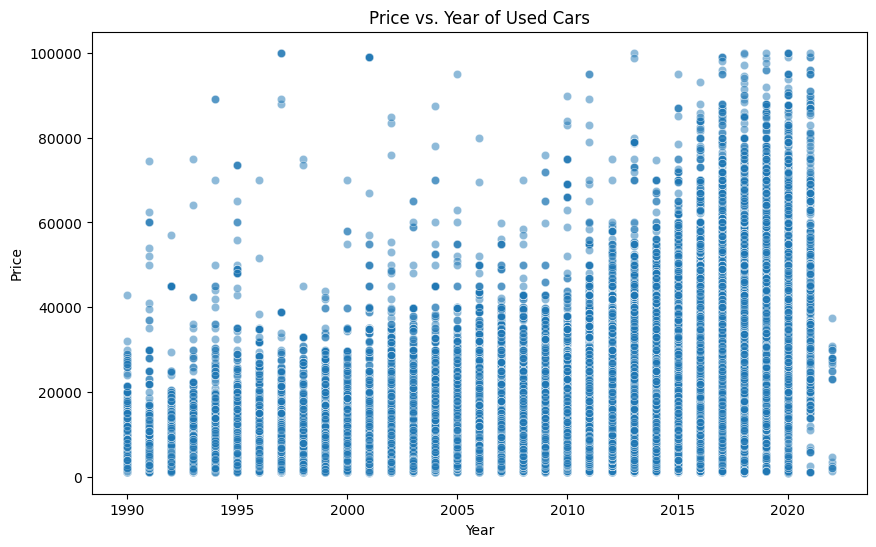

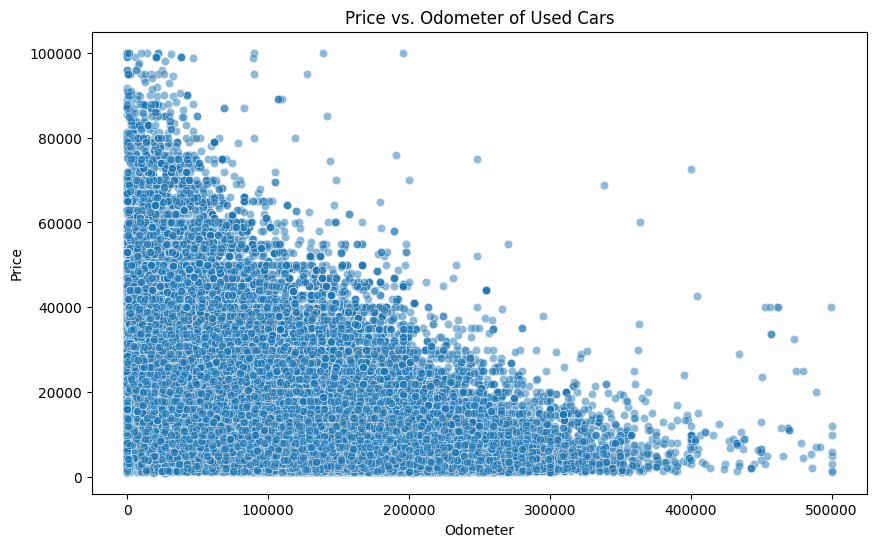

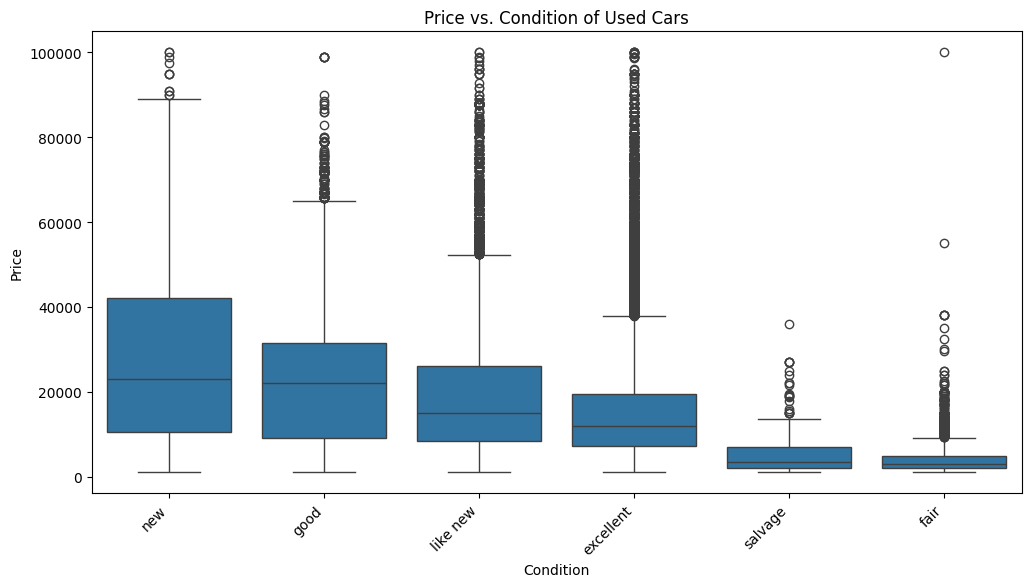

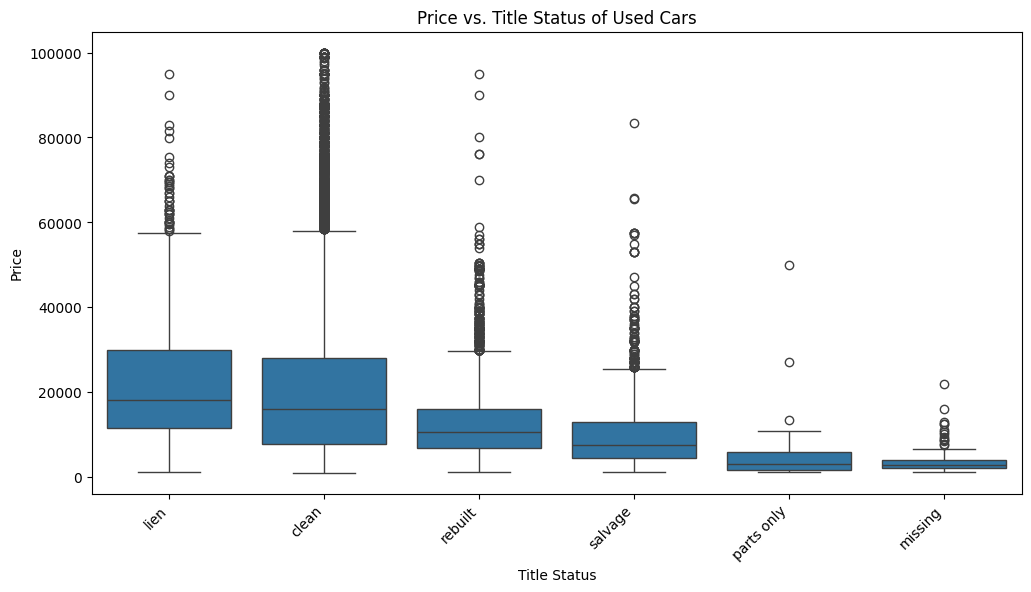

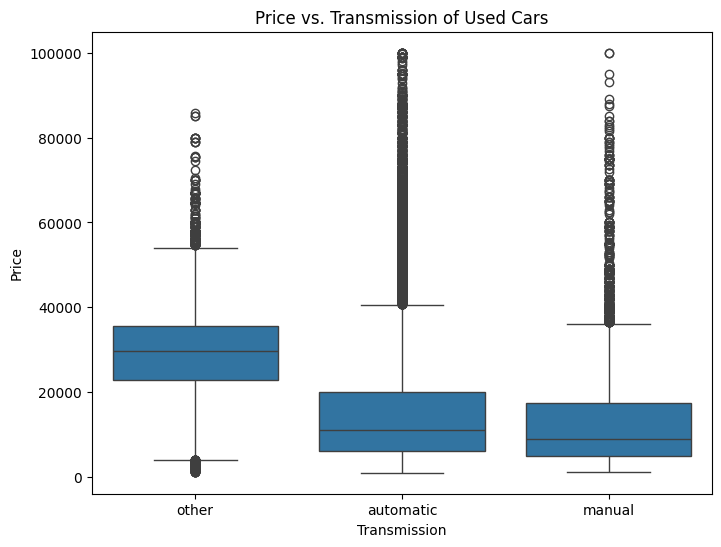

In [34]:
# Plotting some features of used cars

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'year' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=used_cars, x='year', y='price', alpha=0.5)
plt.title('Price vs. Year of Used Cars')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Scatter plot of 'odometer' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=used_cars, x='odometer', y='price', alpha=0.5)
plt.title('Price vs. Odometer of Used Cars')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Box plot of 'condition' vs 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=used_cars, x='condition', y='price', order=condition_summary.sort_values(by='average_price', ascending=False)['condition'])
plt.title('Price vs. Condition of Used Cars')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot of 'title_status' vs 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=used_cars, x='title_status', y='price', order=title_status_summary.sort_values(by='average_price', ascending=False)['title_status'])
plt.title('Price vs. Title Status of Used Cars')
plt.xlabel('Title Status')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot of 'transmission' vs 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(data=used_cars, x='transmission', y='price', order=transmission_summary.sort_values(by='average_price', ascending=False)['transmission'])
plt.title('Price vs. Transmission of Used Cars')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()